# modules needed to run the code

numpy, scipy(for erfc function), matplotlib

To install these modules if not already installed run the cell below
after removing the #s

if there are log(0) when running cells with bit error rate code 
please run the cell again. the second run will most probably won't have log10(zero) errors.
This is because when p(e) is very low the number of errors in simulation will be zero sometimes.
we can increase the number of symbols in the simulation but that would increase the compute time
significantly and may crash the code

cells containing error rate simulations may take some time

In [1]:
#!pip install numpy
#!pip install scipy
#!pip install matplotlib

In [2]:
savefig_ = False

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def g_fxn(t,beta,T):
    '''function to evaluate the raised cosine'''
    denominator = (1 - 4*(beta*t/T)**2)
    zero_in_denom = min(abs(denominator)) == 0
#     print(zero_in_denom,beta)
    if zero_in_denom:  # to avoid division by zero error
        t += 1e-6
        denominator = (1 - 4*(beta*t/T)**2)
        
    #np.sinc = sin(pi*x)/(pi*x)
    return np.sinc(t/T)*np.cos(np.pi*beta*t/T)/denominator  

def trunc(t0,L=10,J=10,T=1):
    '''truncate raised cosine function to 2LJ + 1 samples
    from time -LT to LT'''
    return np.linspace(t0 - L*T, t0 + L*T, 2*L*J+1 )

In [5]:
def rand_bin_seq_gen(N):
    '''random sequence of {-1, +1} of length N'''
    return np.array([2*random.randint(0,1) - 1 for i in range(N)])

def seq2I(seq,J):
    '''function to interleave J-1 zeros in I(data) sequence'''
    a = np.zeros( (len(seq)-1)*J + 1 )
    for ind,i in enumerate(seq):
        a[ind*J] = i
    return a

def i2x(I,J,L,beta,T):
    '''x(kTs) = output of digital filter g for input I(kTs)'''
    pad_len = L*J
    Ts      = T/J
    g_arr   = g_fxn(trunc(0,L,J,T),beta,T)
    
    x_len = pad_len + len(I) + pad_len
    x     = np.zeros(x_len)
    t     = np.linspace(-L*T, (len(I)//J + L)*T, x_len)
    
    for ind in range(pad_len,len(I)+pad_len):
        ind0, ind1 = ind - pad_len, ind + pad_len + 1
        if I[ind0]:
            x[ind0:ind1] += g_arr*I[ind0]
    return t,x

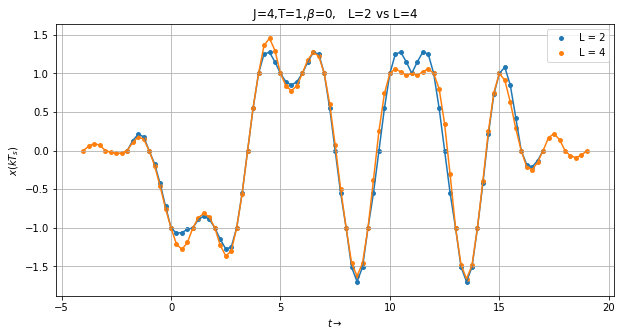

In [6]:
#Q1 a,b
J,beta,T = 4,0,1# The value of T doesn't matter much

Ibits = 2*np.random.randint(0,2,size=16) - 1 # random sequence of -1 and +1 equi probable
I = seq2I(Ibits,J)                           # adding J-1 zeros between each bit

t1,x1 = i2x(I, J=J, L=2, beta=beta, T=T)
t2,x2 = i2x(I, J=J, L=4, beta=beta, T=T)

symbol_size = 15 # size of symbols/points in graph

# # plt.figure(figsize=(12,4))
# # plt.subplot(121)
# # plt.plot(t1,x1);plt.scatter(t1,x1,s=symbol_size)
# # plt.subplot(122)
# # plt.plot(t2,x2);plt.scatter(t2,x2,s=symbol_size)
# # # plt.subplot(133)

plt.figure(figsize=(10,5))
plt.title(r'J=4,T=1,$\beta$=0,   L=2 vs L=4')
plt.plot(t1,x1);plt.scatter(t1,x1,s=symbol_size,label='L = 2')
plt.plot(t2,x2);plt.scatter(t2,x2,s=symbol_size,label='L = 4') 

plt.xlabel(r'$t \rightarrow$')
plt.ylabel(r'$x(kT_s)$')
plt.legend()
plt.grid()
# print(t2)


# Observations 1a and 1b

increase in L implies a better approximation for the raised cosine pulse,
and more tails overlapping over the peaks.

    so for most of the randomly generated I(16 bit message) the peak value in L = 4
are more than L=2. this is because around 8(i.e, 2*L) tails are overlapping
on each peak for L=4 and 4 for L=2. depending on the sign of the tails the peak value for L=4
is greater L = 4 (in most cases).

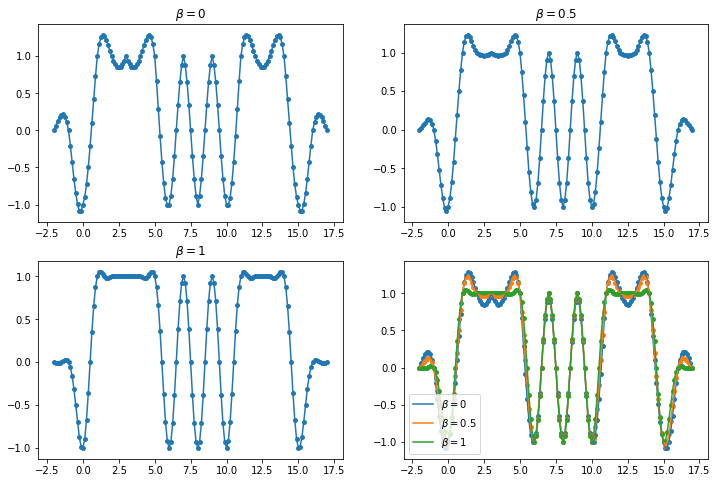

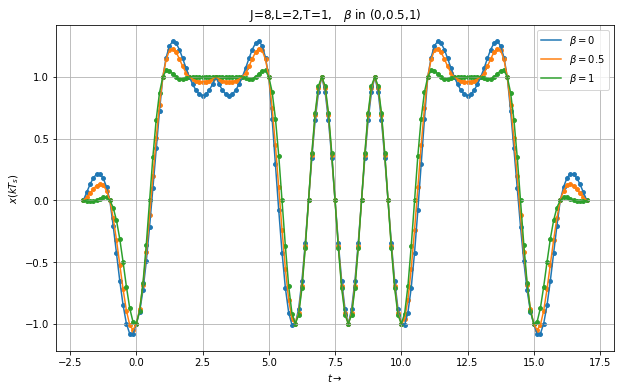

In [7]:
J,L,T = 8,2,1

Ibits = 2*np.random.randint(0,2,size=16) - 1 # random sequence of -1 and +1 equi probable
I = seq2I(Ibits,J)                           # adding J-1 zeros between each bit

symbol_size = 15 # size of symbols/points in graph

plt.figure(figsize=(12,8))
ax22 = plt.subplot(2,2,4)
for ind,beta in enumerate( (0,0.5,1)):
    label = r'$\beta = ${0}'.format(beta)
    t,x = i2x(I,J,L,beta,T)
    plt.subplot(2,2,ind+1)
    plt.plot(t,x);plt.scatter(t,x,s=symbol_size)
    plt.title(label)
    ax22.plot(t,x,label=label);ax22.scatter(t,x,s=symbol_size)
ax22.legend()

symbol_size = 15
plt.figure(figsize=(10,6))
for ind,beta in enumerate( (0,0.5,1)):
    label = r'$\beta = ${0}'.format(beta)
    t,x = i2x(I,J,L,beta,T)
    plt.plot(t,x,label=label);plt.scatter(t,x,s=symbol_size,marker='o')

plt.title(r'J=8,L=2,T=1,   $\beta$ in (0,0.5,1)')
plt.xlabel(r'$t \rightarrow$')
plt.ylabel(r'$x(kT_s)$')

plt.legend()
plt.grid()

# Observations 1 c

from the figure below. we can see that as beta increases most of the
energy of raised cosine is concentrated in -T to T., and very less 
energy is in the tail. The tail is almost zero for |t| > T.

so as beta increases, bandwidth of g(t) increases as tail energy decreases
(which makes the signal essentially truncated from -T to T).

we can say the bandwidth of x(kTs) increases with beta since the bandwidth
of the pulse shape used i.e, raised cosine increases with beta.

    In the above figure. since the tail energy is less for large beta.
we see less peaking for large beta. since the tails dont accumulate over
other peaks of sinc(for high beta). The deviation from 1
at these peaks is less for high beta.
    
    so the peak value of x(kTs) moves closer to 1 (from > 1) as beta increases
    
as beta increases the response become flatter for consecutive 1 s or -1 s

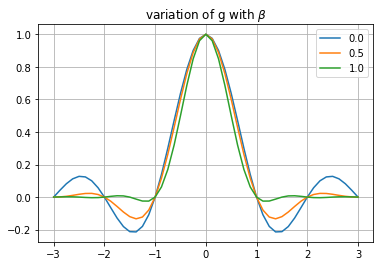

In [8]:
T = 1
t = np.linspace(-3,3,1000)
t = trunc(0,L=3,J=8,T=T)
plt.title(r'variation of g with $\beta$')
for beta in np.linspace(0,1,3):
    y = g_fxn(t,beta,T)
    plt.plot(t,y,label='{0:0.1f}'.format(beta))
# plt.plot(t,np.sinc(t/T))
plt.legend()
plt.grid()

# Question 2 

In [9]:
from scipy.special import erfc
def q_func(x):
    '''q function interms of erfc'''
    return 0.5*erfc(x/np.sqrt(2))

def q_func_cher(x):
    '''q function using chernoff bound'''
#     assert np.all(x>=0)
    return np.exp(-0.5*np.square(x))

In [10]:
names = {2:'BPSK', 4:'QPSK', 16:'16-QAM'}
d_Eb  = {2: 1,     4: 1,     16: 1/np.sqrt(2.5) }#half the minimum distance of constellation for unit Eb

def p_error_fxn(Eb,N0,n=2):
    '''n = 2 BPSK, n = 4 QPSK, n = 16 16QAM'''
    d = d_Eb[n]*Eb
    q = q_func(d/np.sqrt(N0/2))
    if n == 2:   return   q
    if n == 4:   return 2*q - q**2
    if n == 16:  return 3*q - 9*q**2/4

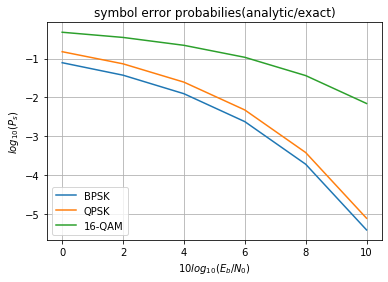

In [11]:
#a)
plt.figure()
for n in (2,4,16):
    N0_arr = np.logspace(0,-1,6)
    # print(N0_arr,10*np.log10(1/N0_arr))
    p_error     = np.array([p_error_fxn(1,N0,n=n) for N0 in N0_arr])
    log_p_error = np.log10(p_error)
    log_SNR     = 10*np.log10(1/N0_arr)

    plt.plot(log_SNR,log_p_error,label = names[n])

plt.title('symbol error probabilies(analytic/exact)')
plt.ylabel(r'$log_{10}(P_s)$')
plt.xlabel(r'$10log_{10}(E_b/N_0)$')
plt.legend()
plt.grid()
if savefig_:
    plt.savefig('figure1.png')

# Observation 2a

observation 2a

The p(e) for 16-QAM does not decrease with increase in 10log10(Eb/N0)
as much as BPSK and QPSK

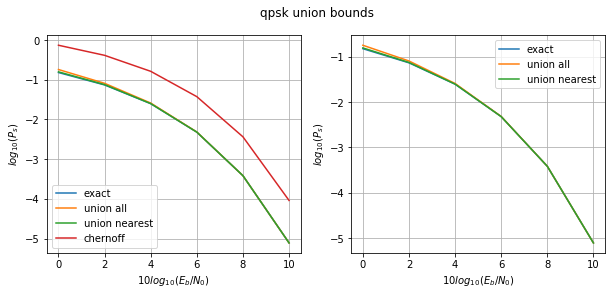

In [12]:
#b)QPSK (assuming all symbols are equi probable)
N0_arr  = np.logspace(0,-1,6)
log_SNR = 10*np.log10(1/N0_arr)
d       = d_Eb[4]
tmp_fxn = lambda q: 2*q - q**2

#exact symbol error
p_error_qpsk = np.array([p_error_fxn(1,N0,n=4) for N0 in N0_arr])
#union bound using all the pairwise symbol error
pu1_qpsk = np.array([q_func(d/np.sqrt(N0/2))*2 + 
                q_func(np.sqrt(2)*d/np.sqrt(N0/2))   for N0 in N0_arr])
#union bound using only the nearest neighbours
pu2_qpsk = np.array([q_func(d/np.sqrt(N0/2))*2       for N0 in N0_arr])
#chernoff union bound using nearest neighbours
puc_qpsk = np.array([q_func_cher(d/np.sqrt(N0/2))*2  for N0 in N0_arr])

#taking log of probabilities
p_error_qpsk = np.log10(p_error_qpsk)
pu1_qpsk     = np.log10(pu1_qpsk)
pu2_qpsk     = np.log10(pu2_qpsk)
puc_qpsk     = np.log10(puc_qpsk)

plt.figure(figsize=(10,4))
plt.suptitle('qpsk union bounds')
plt.subplot(121)
plt.plot(log_SNR,p_error_qpsk,label='exact')
plt.plot(log_SNR,pu1_qpsk    ,label='union all')
plt.plot(log_SNR,pu2_qpsk    ,label='union nearest')
plt.plot(log_SNR,puc_qpsk    ,label='chernoff')
plt.ylabel(r'$log_{10}(P_s)$')
plt.xlabel(r'$10log_{10}(E_b/N_0)$')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(log_SNR,p_error_qpsk,label='exact')
plt.plot(log_SNR,pu1_qpsk    ,label='union all')
plt.plot(log_SNR,pu2_qpsk    ,label='union nearest')
plt.ylabel(r'$log_{10}(P_s)$')
plt.xlabel(r'$10log_{10}(E_b/N_0)$')
plt.legend()
plt.grid()
if savefig_:
    plt.savefig('figure2.png')

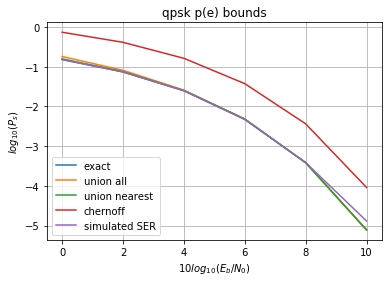

In [13]:
#c) SER = PB for  QPSK 
d  = d_Eb[4]
n_symb = int(1e6) #10 power 5
N0_arr  = np.logspace(0,-1,6)
log_SNR = 10*np.log10(1/N0_arr)

SER_arr_qpsk = np.zeros_like(N0_arr) 
for ind,N0 in enumerate(N0_arr):
    #generating random message
    I_real_part = d*(2*np.random.randint(0,2,size=n_symb) - 1)
    I_imag_part = d*(2*np.random.randint(0,2,size=n_symb) - 1)
    #adding gaussian noise
    r_real_part = I_real_part + np.random.randn(n_symb)*np.sqrt(N0/2)
    r_imag_part = I_imag_part + np.random.randn(n_symb)*np.sqrt(N0/2)

    r_pred_real = np.where(r_real_part>0, d, -d)
    r_pred_imag = np.where(r_imag_part>0, d, -d)

    error_count = np.logical_or( I_real_part != r_pred_real, I_imag_part != r_pred_imag) 
    SER_arr_qpsk[ind]= error_count.sum()/n_symb

#taking log of probability
SER_arr_qpsk = np.log10(SER_arr_qpsk + 1e-12)# + 1e-12 to avoid log(0) error

plt.figure(figsize=(6,4))
plt.title('qpsk p(e) bounds')
plt.plot(log_SNR,p_error_qpsk,label='exact')
plt.plot(log_SNR,pu1_qpsk    ,label='union all')
plt.plot(log_SNR,pu2_qpsk    ,label='union nearest')
plt.plot(log_SNR,puc_qpsk    ,label='chernoff')
plt.plot(log_SNR,SER_arr_qpsk,label='simulated SER')
plt.ylabel(r'$log_{10}(P_s)$')
plt.xlabel(r'$10log_{10}(E_b/N_0)$')
plt.legend()
plt.grid()

if savefig_:
    plt.savefig('figure 2-2.png')

# Comments 2b and 2c

observations from 2b and 2c

all upper bound except chernoff are extremely close to the exact p(e)
chernoff is much higher than the actual p(e)
the simulated symbol error rate SER is also close to exact p(e)

SER is sometimes 0 for high 10log(Eb/N0) like 10. so to avoid 
log(0) errors, SER = SER + epsilon  before taking logarithm
epsilon is a small positive quanitity

so SER may deviate slightly from p(e) at high SNR

# Comments 2d

comments 2d
for generating random symbols
with sample space {-3d , -d, d, 3d} and uniform probabililty 

x = np.random.randint(low = -2,high = 2,size = n_symb)
x is an array of lenght n_symb
each element of is an element of the set {-2,-1,0,1} with equal probability
y = (2*x + 1)*d
each element of the array y will be {-3d,-d,d,3d} with equal probability

both real and imaginary parts are iid with sample space {-3d,-d,d,3d} and
uniform probability

random symbol generation for qpsk also had a similar procedure

[-0.32227445 -0.45273001 -0.65576497 -0.9657326  -1.43509733 -2.16685289]


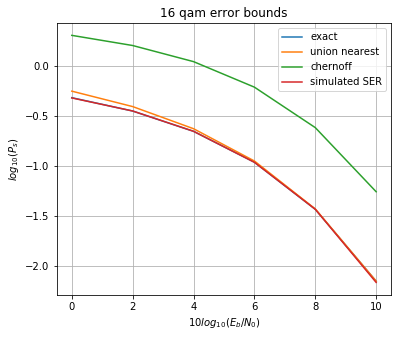

In [14]:
#d) SER = PB for  16-QAM
d  = d_Eb[16]
n_symb = int(1e5) #10 power 5

def predict_16qam(x,d):
    if x >=  2*d:  return  3*d
    if x >=  0  :  return  d
    if x >= -2*d:  return -d
    return -3*d
predict_16qam = np.vectorize(predict_16qam)

N0_arr  = np.logspace(0,-1,6)
log_SNR = 10*np.log10(1/N0_arr)

SER_arr_16qam = np.zeros_like(N0_arr)
for ind,N0 in enumerate(N0_arr):
    #generating random message
    I_real_part = d*(2*np.random.randint(low = -2,high = 2,size = n_symb)+1)
    I_imag_part = d*(2*np.random.randint(low = -2,high = 2,size = n_symb)+1)
    
    #adding gaussian noise
    r_real_part = I_real_part + np.random.randn(n_symb)*np.sqrt(N0/2)
    r_imag_part = I_imag_part + np.random.randn(n_symb)*np.sqrt(N0/2)

    #predicting transmitted message from real message
    r_pred_real = predict_16qam(r_real_part,d)
    r_pred_imag = predict_16qam(r_imag_part,d)

    error_count = np.logical_or( I_real_part != r_pred_real, I_imag_part != r_pred_imag) 
    SER_arr_16qam[ind] = error_count.sum()/n_symb


#e)16QAM
N0_arr  = np.logspace(0,-1,6)
log_SNR = 10*np.log10(1/N0_arr)
d       = d_Eb[16]
tmp_fxn = lambda q: 3*q - 9*q**2/4

#exact symbol error
p_error_16qam = np.array([p_error_fxn(1,N0,n=16)      for N0 in N0_arr])

#union bound using only the nearest neighbours
#average number of nearest neighbours per symbol = (2*4 + 3*8 + 4*4)/16 = 3
pu2_16qam = np.array([q_func(d/np.sqrt(N0/2))*3       for N0 in N0_arr])

#chernoff bound 
puc_16qam = np.array([q_func_cher(d/np.sqrt(N0/2))*3  for N0 in N0_arr])

#taking log of probabilities
p_error_16qam = np.log10(p_error_16qam)
pu2_16qam     = np.log10(pu2_16qam)
puc_16qam     = np.log10(puc_16qam)
SER_arr_16qam = np.log10(SER_arr_16qam  + 1e-12) # to avoid log(0) error

print(SER_arr_16qam)

plt.figure(figsize=(6,5))
# plt.suptitle('16 qam error bounds')
# plt.subplot(121)
plt.title('16 qam error bounds')
plt.plot(log_SNR,p_error_16qam,label='exact')
plt.plot(log_SNR,pu2_16qam    ,label='union nearest')
plt.plot(log_SNR,puc_16qam    ,label='chernoff')
plt.plot(log_SNR,SER_arr_16qam,label='simulated SER')
plt.grid()
plt.ylabel(r'$log_{10}(P_s)$')
plt.xlabel(r'$10log_{10}(E_b/N_0)$')
plt.legend()

# plt.subplot(122)
# plt.plot(log_SNR,p_error_16qam,label='exact')
# plt.plot(log_SNR,pu2_16qam    ,label='union nearest')
# plt.plot(log_SNR,SER_arr_16qam,label='simulated SER')
# plt.legend()

if savefig_:
    plt.savefig('figure 3.png')

# Observations 2d and 2e

 The observations for 2d and 2e are similar to that of 2c and 2b.
 
 The chernoff union bound is too high and the other bounds are very tight.
 
 SER is almost equal to exact p(Symbol error)

In [15]:
def n_ones(x):
    '''function to count the number of ones in the binary representation of x'''
    return bin(x).count('1')

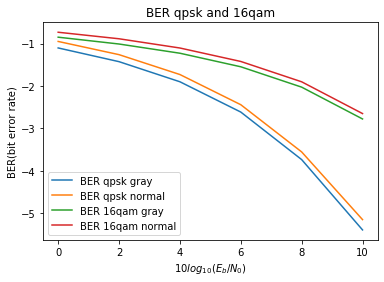

In [16]:
#f)
#QPSK with and without gray mapping
d  = d_Eb[4]
n_symb = int(1e6) #10 power 5
gray_mapping_qpsk = { (-d,d) :0b00, (d,d) :0b01,
                      (-d,-d):0b10, (d,-d):0b11 }

norm_mapping_qpsk = { (-d,d) :0b00, (d,d) :0b01,
                      (-d,-d):0b11, (d,-d):0b10 }

def bit_error_qpsk(s1_real,s1_imag,s2_real,s2_imag,mapping):
    return n_ones( mapping[(s1_real,s1_imag)] ^ mapping[(s2_real,s2_imag)] )
bit_error_qpsk = np.vectorize(bit_error_qpsk)

N0_arr  = np.logspace(0,-1,6)
log_SNR = 10*np.log10(1/N0_arr)

SER_arr_qpsk = np.zeros_like(N0_arr)
BER_arr_qpsk_gray = np.zeros_like(N0_arr)
BER_arr_qpsk_norm = np.zeros_like(N0_arr)

for ind,N0 in enumerate(N0_arr):
    #generating random message
    I_real_part = d*(2*np.random.randint(0,2,size=n_symb) - 1)
    I_imag_part = d*(2*np.random.randint(0,2,size=n_symb) - 1)
    #adding gaussian noise
    r_real_part = I_real_part + np.random.randn(n_symb)*np.sqrt(N0/2)
    r_imag_part = I_imag_part + np.random.randn(n_symb)*np.sqrt(N0/2)

    r_pred_real = np.where(r_real_part>0, d, -d)
    r_pred_imag = np.where(r_imag_part>0, d, -d)
    
    symb_error_count     = np.logical_or( I_real_part != r_pred_real, I_imag_part != r_pred_imag) 
    bit_error_count_gray = bit_error_qpsk( I_real_part, I_imag_part,
                                           r_pred_real, r_pred_imag, gray_mapping_qpsk)
    bit_error_count_norm = bit_error_qpsk( I_real_part, I_imag_part,
                                           r_pred_real, r_pred_imag, norm_mapping_qpsk)
    
    SER_arr_qpsk[ind]      = symb_error_count.sum()    /n_symb
    BER_arr_qpsk_gray[ind] = bit_error_count_gray.sum()/(n_symb*2)
    BER_arr_qpsk_norm[ind] = bit_error_count_norm.sum()/(n_symb*2)
    
#16QAM with and without gray mapping
d  = d_Eb[16]

def predict_16qam(x,d):
    '''fucntion to predict the transmitted message from received message using MAP rule'''
    if x >=  2*d:  return  3*d
    if x >=  0  :  return  d
    if x >= -2*d:  return -d
    return -3*d
predict_16qam = np.vectorize(predict_16qam)

n_symb = int(1e5) #10 power 5

#demapping schemes gray code and non gray code
gray_mapping_16qam = { (-3*d, 3*d) :0b0000, (-d, 3*d) :0b0001, (d, 3*d) :0b0011, (3*d, 3*d) :0b0010,
                       (-3*d,   d) :0b0100, (-d,   d) :0b0101, (d,   d) :0b0111, (3*d,   d) :0b0110,
                       (-3*d,  -d) :0b1100, (-d,  -d) :0b1101, (d,  -d) :0b1111, (3*d,  -d) :0b1110,
                       (-3*d,-3*d) :0b1000, (-d,-3*d) :0b1001, (d,-3*d) :0b1011, (3*d,-3*d) :0b1010  } 

norm_mapping_16qam = { (-3*d, 3*d) :  0, (-d, 3*d) :  1, (d, 3*d) :  2, (3*d, 3*d) :  3,
                       (-3*d,   d) :  4, (-d,   d) :  5, (d,   d) :  6, (3*d,   d) :  7,
                       (-3*d,  -d) :  8, (-d,  -d) :  9, (d,  -d) : 10, (3*d,  -d) : 11,
                       (-3*d,-3*d) : 12, (-d,-3*d) : 13, (d,-3*d) : 14, (3*d,-3*d) : 15   }


def bit_error_16qam(s1_real,s1_imag,s2_real,s2_imag,mapping):
    return n_ones( mapping[(s1_real,s1_imag)] ^ mapping[(s2_real,s2_imag)] )
bit_error_16qam = np.vectorize(bit_error_16qam)

N0_arr  = np.logspace(0,-1,6)
log_SNR = 10*np.log10(1/N0_arr)

SER_arr_16qam      = np.zeros_like(N0_arr)
BER_arr_16qam_gray = np.zeros_like(N0_arr)
BER_arr_16qam_norm = np.zeros_like(N0_arr)

for ind,N0 in enumerate(N0_arr):
    #generating random message
    I_real_part = d*(2*np.random.randint(low = -2,high = 2,size = n_symb)+1)
    I_imag_part = d*(2*np.random.randint(low = -2,high = 2,size = n_symb)+1)
    
    #adding gaussian noise
    r_real_part = I_real_part + np.random.randn(n_symb)*np.sqrt(N0/2)
    r_imag_part = I_imag_part + np.random.randn(n_symb)*np.sqrt(N0/2)

    r_pred_real = predict_16qam(r_real_part,d)
    r_pred_imag = predict_16qam(r_imag_part,d)
    
    symb_error_count     = np.logical_or( I_real_part != r_pred_real, I_imag_part != r_pred_imag) 
    bit_error_count_gray = bit_error_16qam( I_real_part, I_imag_part,
                                           r_pred_real, r_pred_imag, gray_mapping_16qam)
    bit_error_count_norm = bit_error_16qam( I_real_part, I_imag_part,
                                           r_pred_real, r_pred_imag, norm_mapping_16qam)
    
    SER_arr_16qam[ind]      = symb_error_count.sum()    /n_symb
    BER_arr_16qam_gray[ind] = bit_error_count_gray.sum()/(n_symb*4)
    BER_arr_16qam_norm[ind] = bit_error_count_norm.sum()/(n_symb*4)


#taking log of probabilites
SER_arr_qpsk      = np.log10(SER_arr_qpsk)
BER_arr_qpsk_gray = np.log10(BER_arr_qpsk_gray)
BER_arr_qpsk_norm = np.log10(BER_arr_qpsk_norm)

SER_arr_16qam      = np.log10(SER_arr_16qam)
BER_arr_16qam_gray = np.log10(BER_arr_16qam_gray)
BER_arr_16qam_norm = np.log10(BER_arr_16qam_norm)

plt.figure(figsize=(6,4))
plt.plot(log_SNR,BER_arr_qpsk_gray,label='BER qpsk gray')
plt.plot(log_SNR,BER_arr_qpsk_norm,label='BER qpsk normal')
# plt.plot(log_SNR,SER_arr_qpsk,label='simulated SER')

plt.plot(log_SNR,BER_arr_16qam_gray,label='BER 16qam gray')
plt.plot(log_SNR,BER_arr_16qam_norm,label='BER 16qam normal')
# plt.plot(log_SNR,SER_arr_16qam,label='simulated SER')

plt.ylabel('BER(bit error rate)')
plt.xlabel(r'$10log_{10}(E_b/N_0)$')

plt.title('BER qpsk and 16qam')
plt.legend()
if savefig_:
    plt.savefig('figure 4.png')

# Observations 2f

The bit error rate for gray code is less than any other code in the respective constellation
BER gray code for qpsk < BER non gray code for qpsk < BER gray code for 16-qam < BER non gray code for 16-qam


symbol to bit mappings are

gray_mapping_16qam = { 

(-3*d, 3*d) :0b0000, (-d, 3*d) :0b0001, (d, 3*d) :0b0011, (3*d, 3*d) :0b0010,

(-3*d,   d) :0b0100, (-d,   d) :0b0101, (d,   d) :0b0111, (3*d,   d) :0b0110,
                       
(-3*d,  -d) :0b1100, (-d,  -d) :0b1101, (d,  -d) :0b1111, (3*d,  -d) :0b1110,
                       
(-3*d,-3*d) :0b1000, (-d,-3*d) :0b1001, (d,-3*d) :0b1011, (3*d,-3*d) :0b1010  } 

norm_mapping_16qam = { 

(-3*d, 3*d) :  0, (-d, 3*d) :  1, (d, 3*d) :  2, (3*d, 3*d) :  3,

(-3*d,   d) :  4, (-d,   d) :  5, (d,   d) :  6, (3*d,   d) :  7,
                       
(-3*d,  -d) :  8, (-d,  -d) :  9, (d,  -d) : 10, (3*d,  -d) : 11,
                       
(-3*d,-3*d) : 12, (-d,-3*d) : 13, (d,-3*d) : 14, (3*d,-3*d) : 15   }

gray_mapping_qpsk = { (-d,d) :0b00, (d,d) :0b01,

                      (-d,-d):0b10, (d,-d):0b11 }

norm_mapping_qpsk = { (-d,d) :0b00, (d,d) :0b01,

                      (-d,-d):0b11, (d,-d):0b10 }

d is different for qpsk and 16qam